In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_excel('/content/drive/MyDrive/Compile_Label_Data.xlsx')

In [ ]:
df.head()

,Lemma,Label
0,Video show Nancy Pelosi say give shoot kill ...,1
1,George Soros ban Russia Pakistan Turkey Hung...,1
2,U N call decriminalize sex minor,1
3,Scientists struggle understand Antarctica wa...,1
4,La Reserva Federal present su nuevo sistema ...,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [ ]:
x=df['Lemma']
y=df['Label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [ ]:
nb = MultinomialNB(alpha =36, fit_prior= True)
nb.fit(xv_train,y_train)

MultinomialNB(alpha=36)

In [ ]:
nbpred=nb.predict(xv_test)

In [ ]:
nb.score(xv_test, y_test)

0.5976560456233977

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, nbpred))

              precision    recall  f1-score   support

           0       0.61      0.35      0.45     17540
           1       0.59      0.81      0.68     20686

    accuracy                           0.60     38226
   macro avg       0.60      0.58      0.56     38226
weighted avg       0.60      0.60      0.57     38226



In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
cm = confusion_matrix(y_test,nbpred)

In [ ]:
labels = [['True Negative', 'False Positive'], ['False Negative', 'True Positive']]

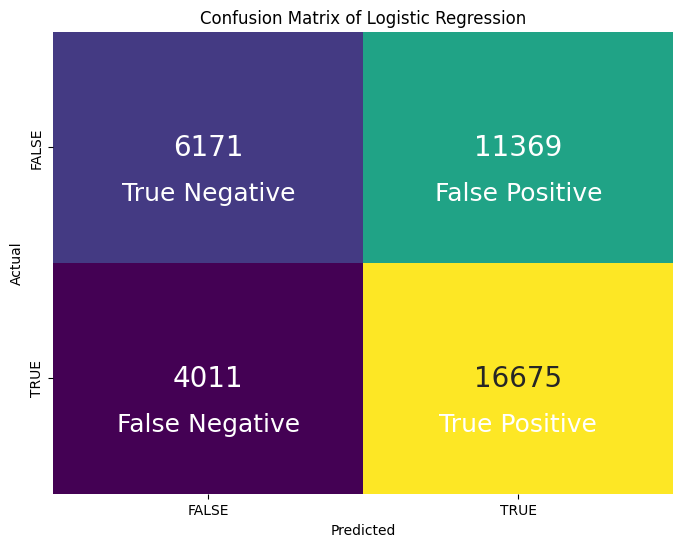

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="viridis", fmt="d", cbar=False,
            xticklabels=['FALSE', 'TRUE'],
            yticklabels=['FALSE', 'TRUE'],annot_kws={"size": 20})
for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, i + 0.7, labels[i][j], ha='center', va='center', fontsize=18, color='white')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

In [ ]:
from sklearn.calibration import calibration_curve
true_prob, pred_prob = calibration_curve(y_test,nbpred, n_bins=10)

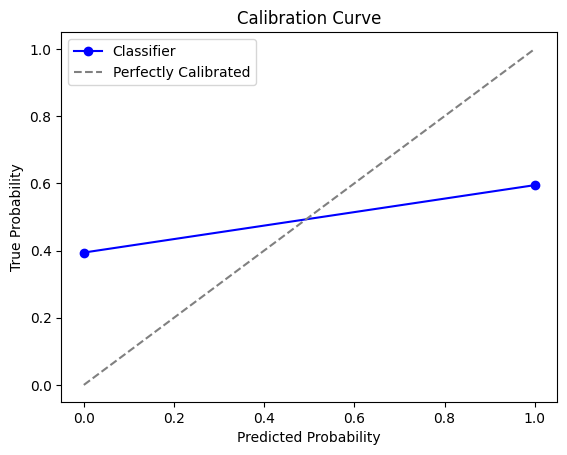

In [ ]:
plt.plot(pred_prob, true_prob, marker='o', linestyle='-', color='blue', label='Classifier')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Calibration Curve')
plt.legend()
plt.show()

In [ ]:
residuals = y_test - nbpred

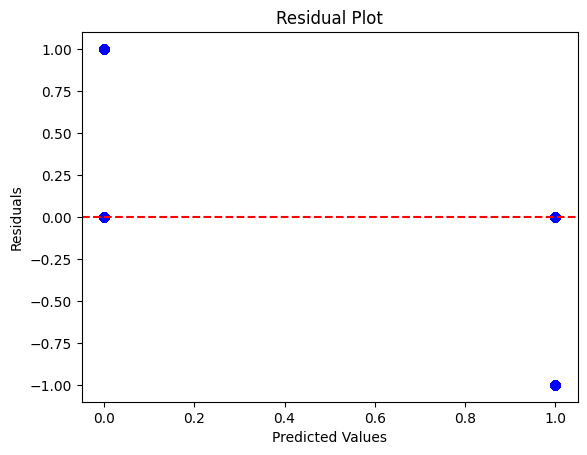

In [ ]:
plt.scatter( nbpred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test,nbpred)

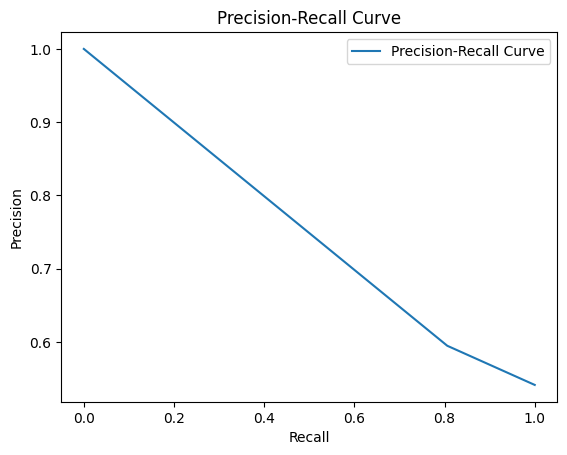

In [ ]:
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [25]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [26]:
scores = cross_val_score(nb, xv_train,y_train, cv=kfold, scoring='accuracy')

In [27]:
average_accuracy = scores.mean()
average_accuracy

0.5954436607469857

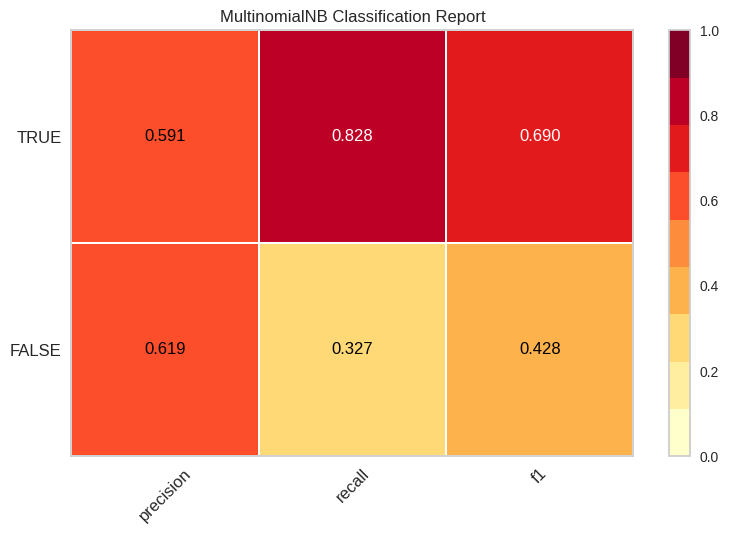

<Axes: title={'center': 'MultinomialNB Classification Report'}>

In [ ]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(nb, classes=['FALSE', 'TRUE'])
visualizer.fit(xv_train,y_train)
visualizer.score(xv_test, y_test)
visualizer.show()

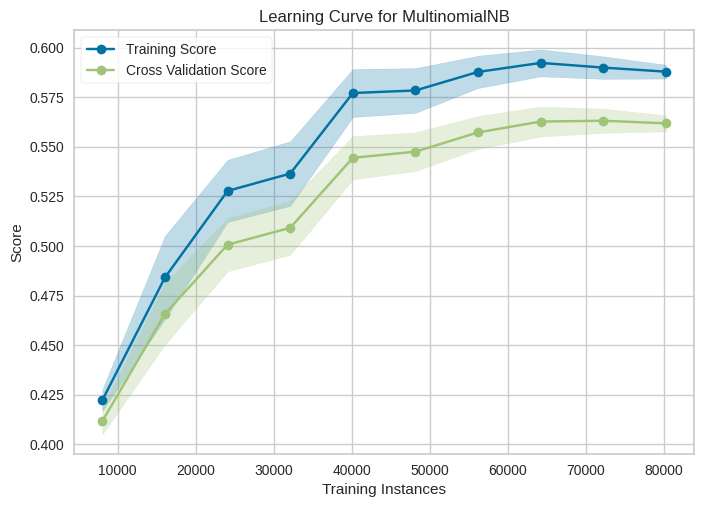

<Axes: title={'center': 'Learning Curve for MultinomialNB'}, xlabel='Training Instances', ylabel='Score'>

In [ ]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import LearningCurve
cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

lc_viz = LearningCurve(
    nb, cv=cv, scoring='f1_weighted', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

lc_viz.fit(xv_train,y_train)
lc_viz.show()

In [ ]:
import random


random_index = random.randint(0, len(df)-1)
text =df.iloc[random_index]['Lemma']
text_transformed = vectorization.transform([text])
label_pred = nb.predict(text_transformed)
print("Text: ", text)
if label_pred == 1:
    print('The text is classified as TRUE')
else:
    print('The text is classified as FALSE')
#print("Predicted Label: ", label_pred[0])

Text:    Donald Trump major issue Sen Elizabeth Warren apparent entire presidential campaign basically meltdown every time Warren dare criticize call bullsh Trump every reason fear Warren one outspoken critic make Americans love respect even huge following highly influential role anti Trump movement surprise many attend Trump inauguration know go Several Democrats bear see Trump get swear blame Warren however make point show despite fact Trump insult many time nickname Pocahontas Bill Maher Real Time Warren tell Maher think go inauguration clearly want see happen say go Trump inauguration watch want see want burn eye view ever go moment like Uhh tire get get close eye like Oh God ready back fight Warren share sentiment Americans say day Trump inauguration world change encourage Americans stay positive Trump swear historic Women March also take place weekend Warren say Trump election help Americans find voice passion day make voice hear clear watch Trump inauguration help light fire ins